<a href="https://colab.research.google.com/github/roannarum/Covid19-Clustering-using-K-Means/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Klastering Covid-19 Indonesia Menggunakan Metode K-Means

### Oleh kelompok 3:
- Aini Wijoyo (202103023)
- Dewi Arumsari (202103029)
- Rachel Marta Maria (202103015)

Dataset: https://www.kaggle.com/datasets/hendratno/covid19-indonesia

Artikel Refesensi:

1. https://www.alomedika.com/komunitas/topic/beda-case-fatality-rate-dan-mortality-rate
2. https://www.generali.co.id/id/healthyliving/detail/821/mortality-rate-bagi-seseorang-yang-terkena-virus-corona-tapi-sudah-memiliki-vaksin-atau-belum
3. https://pusdatin.kemkes.go.id/resources/download/pusdatin/infodatin/ANALISIS-RECOVERY-RATE.pdf



# Business Understanding

Indonesia termasuk negara penduduk terpadat di dunia. Indonesia menempati peringkat ke empat penduduk terpadat di dunia, oleh karena itu virus Covid 19 ini dipresiksi akan menyebar dalam waktu yang lama. 

Banyaknya data kasus Covid-19 membutuhkan Data Mining untuk proses pencarian pola yang menarik dan tersembunyi dari kumpulan data yang berukuran besar tersebut. Teknik penambangan data yang dipakai dalam penelitian ini yaitu *clustering*.  Clustering adalah proses pengelompokan dan pembagian pola data menjadi beberapa jumlah data set. Pola serupa yang terbentuk dikelompokan pada cluster yang sama dan memisahkan diri dengan membentuk pola yang berbeda ke cluster yang berbeda.

Tujuan : 
Penelitian ini bertujuan untuk menerapkan algoritma K-Means guna mengelompokan tingkat penyebaran covid 19 di Indonesia yang diperoleh dari wesite dataset Kaggle. Pengelompkan provinsi di Indonesia ke beberapa klaster tertentu sehingga dapat mengetahui daerah dengan jumlah kasus yang banyak dan yang sedikit serta mengetahui daerah yang berbahaya. Hasil klasterisasi provinsi diharapkan dapat memberikan saran kepada pemerintah dalam menentukan aturan
atau kebijakan terkait pembatasan kegiatan masyarakat atau kebijakan lainnya dalam mengatasi penyebaran COVID-19.

# Data Understanding




**Jenis Dataset:** Dataset yang digunakan adalah dataset Covid-19 yang dapat diakses secara public di https://www.kaggle.com/datasets/hendratno/covid19-indonesia.

Berikut beberapa library yang dapat membantu kita dalam melakukan pemodelan pada kasus ini diantaranya:


*   Pandas (untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data).
*   Matplotlib (untuk visualisasi data)
*   Seaborn (membuat plot Matplotlib tradisional terlihat lebih menarik)
*   Scikit-learn (menyediakan algoritma machine learning baik untuk pemodelan)
*   K-Means (khusus untuk algoritma)









In [ ]:
# Koneksikan ke Google Drive untuk ambil dataset dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None) #menampilkan kolom keseluruhan
# Memanggil dataset Covid-19
data = pd.read_csv('/content/drive/MyDrive/Dataset/covid_19_indonesia_time_series_all.csv')

Menampilkan data teratas dan terakhir

In [ ]:
# Menampilkan 5 data teratas
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [ ]:
# Menampilkan 5 data terakhir
data.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,Province,NaN,Sulawesi Utara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,11,4.0,171,332.0,1507.0,13892,2641884,190.17,124.521240,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,Province,NaN,Sumatera Barat,Indonesia,Asia,Sumatera,UTC+07:00,NaN,12,7.0,179,230.0,928.0,42013,5519245,131.37,100.465062,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,Province,NaN,Sumatera Selatan,Indonesia,Asia,Sumatera,UTC+07:00,NaN,13,4.0,241,387.0,2853.0,91592,8217551,89.72,104.169465,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,654,Province,NaN,Sumatera Utara,Indonesia,Asia,Sumatera,UTC+07:00,NaN,25,8.0,450,693.0,5417.0,72981,14874889,203.82,99.051964,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,28460,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


Menampilkan **semua nama kolom** pada dataset.

In [ ]:
# Menampilkan semua kolom yang ada pada dataset
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

 Menampilkan **jumlah baris dan kolom** pada dataset.

In [ ]:
# Menampilkan jumlah baris dan kolom dari dataset
data.shape

(31822, 38)

Menampilkan informasi pada dataset seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.

In [ ]:
# Menampilkan informasi feature dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Dataset covid-19 yang digunakan terdiri dari 38 Feature, yaitu:



1.   Date: Tanggal dicatatnya data, tipe data nominal
2. Location ISO Code: Kode lokasi berdasarkan standar ISO
3. Location: nama lokasi
4. New Cases: kasus positif baru harian
5. New Deaths: kematian baru harian
6. New Recovered: Sembuh dalam harian
7. New Active Cases: kasus aktif baru harian
8. Total Cases: Total kasus positif sampai tanggal terkait
9. Total Deaths: Total kematian sampai tanggal terkait
10. Total Recovered: Total sembuh sampai tanggal terkait
11. Total Active Cases: Total kasus aktif sampai tanggal terkait
12. Location Level: level lokasi (provinsi & country)
13. Province: Nama provinsi dari Location
14. Country: Nama country dari Location
15. Continent: nama kontinen dari Location (unique: Asia)
16. Island: nama pulau dari Location
17. Time Zone: Waktu
18. Special Status
19. Total Regencies: Jumlah kabupaten di lokasi.
20. Total Cities: Jumlah kota di lokasi.
21. Total Districts: Jumlah kecamatan di lokasi.
22. Total Urban Villages: Jumlah kelurahan di lokasi.
23. Total Rural Villages: Jumlah desa di lokasi.
24. Area(km2): Area lokasi (km2)
25. Population: populasi di lokasi
26. Population Density: Kepadatan penduduk di lokasi (Rumus: Penduduk/Luas).
27. Longitude: Longitude lokasi
28. Latitude of location: latitude
29. New Cases per Million: Formula: (New Cases / Population) * 1000000
30. Total Cases per Million: Formula: (Total Cases / Population) * 1000000
31. New Deaths per Million: Formula: (New Deaths / Population) * 1000000
32. Total Deaths per Million: Formula: (Total Deaths / Population) * 1000000
33. Total Deaths per 100rb: Formula: (Total Deaths / Total Cases) * 100
34. Case Fatality Rate: Formula: (Total Recovered / Total Cases) * 100
35. Case Recovered Rate: Under 1 means decrease, 1 means flat, above 1 means increase. Formula: Today New Cases / Yesterday New Cases
36. Growth Factor of New Cases: Under 1 means decrease, 1 means flat, above 1 means increase. Formula: Today New Deaths / Yesterday New Deaths
37. Growth Factor of New Death


Dataset memiliki jumlah record/baris 31822
Untuk atribut 'City and Regency' tidak memiliki data apapun sehingga dihapus.



Menampilkan deskriptif statistik data

In [ ]:
# menampilkan deskriptif statistik data
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,30921.000000,31822.000000,30918.000000,30893.000000,3.182200e+04,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,5.835840,417.952297,505.513940,4462.492798,1.106532e+05,1.536766e+07,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,16.390123,1192.995149,1422.070929,12582.736429,3.187865e+05,4.461714e+07,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


# **Data Preparation**

Proses Preprocessing mencakup antara lain : pengecekan missing value (data yang hilang), membuang duplikasi data, memperbaiki kesalahan pada data, label encoding dll. 

## Cek Missing Value

Pengecekan missing value sangat penting untuk melihat apakah data yang terdapat di dataset ada yang kosong atau tidak. Hal ini dikarenakan kosongnya data yang terdapat di dataset akan mengganggu dalam proses **pemodelan**.

In [ ]:
# CEK MISSING VALUE 
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

## Hapus Kolom Tidak Diperlukan

In [ ]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(['Location ISO Code','City or Regency', 'Continent','Country', 'Island','Time Zone','Location Level',
                  'Total Regencies','Total Cities','Total Districts','Total Urban Villages','Total Rural Villages','Area (km2)', 'Growth Factor of New Cases',
                  'Growth Factor of New Deaths', 'Special Status','Longitude','Latitude','New Cases per Million','Total Cases per Million',
                  'New Deaths per Million', 'Total Deaths per Million','Total Deaths per 100rb', 'Case Fatality Rate','Case Recovered Rate',
                  'New Cases','New Deaths','New Recovered', 'New Active Cases','Location'], axis=1)

In [ ]:
data.isna().sum()

Date                    0
Total Cases             0
Total Deaths            0
Total Recovered         0
Total Active Cases      0
Province              929
Population              0
Population Density      0
dtype: int64

setelah menghapus kolom-kolom yang tidak diperlukan, namun terlihat masih ada missing value pada kolom province. Dikarenakan province merupakan data nominal, lebih baik menghapus record dari data yang missing.

## Hapus Baris/Record yang masih banyak missing valuenya

In [ ]:
#menghapus record yang banyak missing valuenya
data = data.dropna(axis = 0, how ='any') 

## Ubah format tanggal

In [ ]:
# Merubah format tanggal
import datetime as datetime

NewDate=[]
for item in data['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    NewDate +=[datetime.date(year,month,day)]
data['Date'] = NewDate
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30893 entries, 0 to 31820
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                30893 non-null  datetime64[ns]
 1   Total Cases         30893 non-null  int64         
 2   Total Deaths        30893 non-null  int64         
 3   Total Recovered     30893 non-null  int64         
 4   Total Active Cases  30893 non-null  int64         
 5   Province            30893 non-null  object        
 6   Population          30893 non-null  int64         
 7   Population Density  30893 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.1+ MB


Menambah kolom baru yaitu **'fatality'**. Case Fatality Rate (CFR) adalah jumlah orang yang meninggal dunia dari total orang yang sakit atau mempunyai gejala suatu penyakit (Yang terkonfirmasi). kolom ini digunakan untuk melihat tingkat keparahan, risiko suatu penyakit pada populasi dan dapat digunakan untuk mengevaluasi mutu fasilitas pelayanan kesehatan

In [ ]:
# Menambah kolom baru yaitu fatality.
data['fatality'] = data['Total Deaths'] / data['Total Cases']

In [ ]:
data.head()

,Date,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province,Population,Population Density,fatality
0,2020-03-01,39,20,75,-56,DKI Jakarta,10846145,16334.31,0.512821
1,2020-03-02,41,20,75,-54,DKI Jakarta,10846145,16334.31,0.487805
3,2020-03-02,1,0,1,0,Riau,6074100,69.80,0.000000
4,2020-03-03,43,20,75,-52,DKI Jakarta,10846145,16334.31,0.465116
6,2020-03-03,1,1,60,-60,Jawa Barat,45161325,1276.55,1.000000


## Visualisasi

**Matplotlib** digunakan untuk membuat grafik dasar.Matplotlib Python bisa disajikan baik dalam bentuk 2D ataupun 3D. Kumpulan data yang besar nantinya akan divisualisasikan dalam bantuan grafik batang, histogram, diagram lingkaran, scatterplot (diagram sebar), line chart dan lain-lain.

**Seaborn** berisi berbagai macam pola dan plot untuk melakukan visualisasi data. Tentunya seaborn dapat mengakomodasi tema yang menarik. Seaborn dapat membantu mengkompilasi seluruh data menjadi satu plot.Library ini dibangun berdasarkan library Matplotlib yang sudah ada. Kemudian terintegrasi dengan struktur data pada Pandas.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.options.mode.chained_assignment = None
limit = 6
group = data.groupby(data['Province'])
t = group.tail(1).sort_values(['Total Cases'], ascending=False).set_index(['Province']).drop(columns=['Date'])
s = data[(data['Province'].isin([i for i in t.index[:limit]]))]
s = s[(s['Total Cases'] >= 100)]

# vis_lp = visualization line plot
vis_lp2 = px.line(s, x='Date', y='Total Cases', color='Province')
vis_lp2.update_layout(title='COVID-19 in Indonesia: total number of cases over time', xaxis_title='Date', yaxis_title='Number of cases', legend_title='<b>Top %s provinces</b>' % limit, legend=dict(x=0.02, y=0.98))
vis_lp2.show()

In [ ]:
import plotly.graph_objects as go

heatmap = data[(data['Total Cases'] >= 100)].sort_values(['Date', 'Province'])
# memfilter data pada kolom "Total Cases" yang memiliki nilai lebih besar atau sama dengan 100 yang akan dipertahankan. 
vis_hmap = go.Figure(data=go.Heatmap(
    z=heatmap['Total Cases'],
    x=heatmap['Date'],
    y=heatmap['Province'],
    colorscale='Viridis'))

vis_hmap.update_layout(
    title='COVID-19 in Indonesia: number of cases over time', xaxis_nticks=34)

vis_hmap.show()

Pada visualisasi diatas menunjukan tingkat keparahan atau tingginya kasus perhari dengan menunjukan perubahan warna. Dalam visualisasi ini didapatkan DKI Jakarta memiliki perubahan warna yang signifikan yang menandakan DKI Jakarta memiliki tingkat kasus yang terbanyak

In [ ]:
t

,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Population,Population Density,fatality
Province,,,,,,,
DKI Jakarta,1412511,15513,1386134,10864,10846145,16334.31,0.010983
Jawa Barat,1173731,15937,1144358,13436,45161325,1276.55,0.013578
Jawa Tengah,636409,33489,601517,1403,36364072,1108.64,0.052622
Jawa Timur,601545,31764,569003,778,40479023,846.78,0.052804
Banten,333875,2950,328482,2443,10722374,1109.64,0.008836
Daerah Istimewa Yogyakarta,224307,5928,217712,667,3631015,1158.90,0.026428
Kalimantan Timur,209017,5726,203022,269,3552191,27.52,0.027395
Bali,166831,4731,161629,471,4216171,729.43,0.028358
Sumatera Utara,158866,3288,154924,654,14874889,203.82,0.020697


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30893 entries, 0 to 31820
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                30893 non-null  datetime64[ns]
 1   Total Cases         30893 non-null  int64         
 2   Total Deaths        30893 non-null  int64         
 3   Total Recovered     30893 non-null  int64         
 4   Total Active Cases  30893 non-null  int64         
 5   Province            30893 non-null  object        
 6   Population          30893 non-null  int64         
 7   Population Density  30893 non-null  float64       
 8   fatality            30893 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 2.4+ MB


Menampilkan Total Kasus Terbanyak

Angka 0.25 dalam kode tersebut menunjukkan ambang batas atau threshold korelasi yang digunakan untuk memfilter korelasi antara dua variabel. Variabel yang memiliki hubungan yang lebih lemah dari nilai threshold akan dihapus.

In [ ]:
corr = t.corr().iloc[[0, 1]].transpose()
corr = corr[(corr['Total Cases'] > 0.25)].sort_values('Total Cases', ascending=False)
features = corr.index.tolist()
features.append('fatality')
data1 = t[features].copy()

data1.head()

,Total Cases,Total Recovered,Total Active Cases,Population Density,Total Deaths,Population,fatality
Province,,,,,,,
DKI Jakarta,1412511,1386134,10864,16334.31,15513,10846145,0.010983
Jawa Barat,1173731,1144358,13436,1276.55,15937,45161325,0.013578
Jawa Tengah,636409,601517,1403,1108.64,33489,36364072,0.052622
Jawa Timur,601545,569003,778,846.78,31764,40479023,0.052804
Banten,333875,328482,2443,1109.64,2950,10722374,0.008836


# MODEL

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

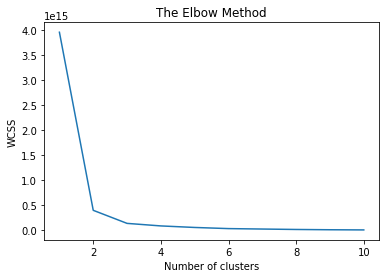

In [ ]:
from sklearn.cluster import KMeans
#membuat array dengan nama wcss
wcss = []
#melakukan perulangan dari 1 sampai 11
for i in range(1, 11):
    #membuat nama variabel = kmeans yang mendeskripsikan jumlah cluster, perulangan k-means, dan random statenya
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    # init = metode untuk inisialisasi centroid (pusat klaster). kenapa 'k-means++' karena dapat menghasilkan centroid awal yang lebih baik.
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
#menampilkan plot wcss

plt.plot(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

In [ ]:
clustering_kmeans = KMeans(n_clusters=3)
clust = clustering_kmeans.fit_predict(data1)
t['cluster'],data1['cluster']=[clust,clust]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data1.sort_values(['cluster','fatality', 'Total Cases','Total Recovered','Total Deaths','Total Active Cases','Population Density'], ascending=False).style.background_gradient(cmap='YlGnBu', low=0, high=0.2)

,Total Cases,Total Recovered,Total Active Cases,Population Density,Total Deaths,Population,fatality,cluster
Province,,,,,,,,
Aceh,44038,41713,102,90.540000,2223,5247257,0.050479,2
Gorontalo,13951,13433,31,104.880000,487,1180651,0.034908,2
Kalimantan Selatan,87476,84740,153,103.840000,2583,4023049,0.029528,2
Riau,152648,147973,223,69.800000,4452,6074100,0.029165,2
Sulawesi Tengah,61099,59276,90,47.790000,1733,2955567,0.028364,2
Bali,166831,161629,471,729.430000,4731,4216171,0.028358,2
Kalimantan Timur,209017,203022,269,27.520000,5726,3552191,0.027395,2
Kalimantan Tengah,58217,56473,179,16.740000,1565,2570289,0.026882,2
Kepulauan Riau,70883,68865,130,235.240000,1888,1929400,0.026635,2


In [ ]:
# visualization using bar chart
# visualization fatality rate by clusters
c = t.sort_values(['cluster', 'fatality'], ascending=False)
data = [go.Bar(x=c[(c['cluster'] == i)].index, y=c[(c['cluster'] == i)]['fatality'],text=c[(c['cluster'] == i)]['fatality'], name=i) for i in range(0, 6)]
data.append(
    go.Scatter(
        x=t.sort_values('fatality', ascending=False).index,
        y=np.full((1, len(t.index)), 0.03).tolist()[0],
        marker_color='black',
        name='rata-rata'
    )
)

vis_bar2 = go.Figure(data=data)
vis_bar2.update_layout(title='K-means Clustering: fatality rate by cluster',
                       xaxis_title='Indonesian', yaxis_title='Deaths per case')
vis_bar2.show()

Penggunaan nilai 0.03 atau 3% sebagai acuan rata-rata bisa bervariasi tergantung pada sumber data dan konteks analisis yang sedang dilakukan. 

Provinsi dengan rasio kematian lebih rendah dari 0,03 dianggap lebih baik dalam mengendalikan wabah Covid-19, sedangkan provinsi dengan rasio kematian lebih tinggi dari 0,03 dapat dianggap perlu melakukan tindakan pencegahan dan penanganan yang lebih baik dalam mengendalikan penyebaran virus dan tingkat kematian.

In [ ]:
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(data1, data1['cluster'])
print ('silhouette coefficient for the clustering above = ', silhouette_avg)

silhouette coefficient for the clustering above =  0.70269660786897


Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1, maka semakin buruk pengelompokan data didalam satu cluster.

# Kesimpulan

Dari hasil klasterisasi 3 klaster terbagi menjadi:



1.   Klaster 2 (high) : Jawa Barat dan DKI Jakarta menjadi provinsi yang paling bahaya. Namun dengan fatality yang rendah, ini berarti pemerintah sudah melakukan tindakan yang sangat baik.
2.   Klaster 1 (Medium) : Jawa Tengah dan Jawa Timur dengan level menengah. Namun kedua provinsi tersebut menunjukan fatality yang sangat tinggi. Untuk klaster ini perlu ditingkatkan lagi terutama kinerja tenaga medis, fasilitas rumah sakit, serta tindakan dari masing-masing individu sesuai protokol kesehatan yang ada.
3. Klaster 0 (Low) : Provinsi-provinsi selain dari klaster 1 dan 2 manjadi provinsi dengan tingkat bahaya yang rendah. namun  provinsi Gorontalo, Sumatera Selatan, Aceh, dan Lampung memiliki tingkat kematian yang tinggi. Provinsi tersebut termasuk ke dalam klaster rendah namun tingkat fatality yang tinggi. ini perlu menjadi perhatian pemerintah dalam penanganan kasus tersebut. Pemerintah perlu meningkatkan kapasitas rumah sakit dan ketersediaan alat kesehatan dan memastikan sumber daya cukup untuk mengatasi krisis COVID-19, meningkatkan kapasitas tes, meningkatkan sistem pelacakan kontak, mendorong isoman, menerapkan pembatasan sosial dan masih banyak lagi cara lainnya.